<a href="https://colab.research.google.com/github/namespaceStedd/atanalize/blob/main/3.1%20Classification%20Movie%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки
import numpy
import pandas
import seaborn
seaborn.set_palette('husl')
import matplotlib.pyplot as pyplot
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Загрузка данных

Это URL-адрес набора данных по цветкам ириса:

https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv


In [ ]:
def optional_import(case, processed):
  if case == 1:
    file = '1-pXQLNrBueN8opV2DLScuPgc3ICyx1bXRISw_XMx4ao' if processed else '1pdvn2vfbOcFS5MOL5oezEaswwiwqKitkJ0sTLh8XTXo';
    url = 'https://docs.google.com/spreadsheets/d/' + file + '/export?format=csv';
    return pandas.read_csv(url);
  else:
    file = 'Toxicity-13F.csv' if processed else 'data.csv';
    from google.colab import drive
    drive.mount('/content/gdrive/')
    return pandas.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Toxicity/Data/' + file);


# Опционально выбираем, как хотим импортировать:
# 1 - по ссылке на Google Spreadsheets
# 0 - прямым импортом с Google Drive
# True - использовать предобработанный файл (13 показателей ;) )
# False - использовать оригинальный (1203 показателя !!!)
toxicity = optional_import(1, True);
toxicity


,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4,Class
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692,NonToxic
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821,NonToxic
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730,NonToxic
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444,NonToxic
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,13.6305,-0.1231,-3.1521,-2.9706,71.9807,2.4269,2.0708,1,1.0932,0.7954,2.8103,-4.3924,0.7136,NonToxic
167,33.1806,-0.0486,-7.2825,-4.0095,125.0777,3.0040,2.0701,3,1.0687,0.9850,3.2560,-4.4435,1.6616,NonToxic
168,28.3570,-0.0726,8.2017,-3.2338,133.7697,3.2468,1.9242,2,1.3249,0.9103,3.2822,-5.5907,1.9339,NonToxic
169,26.4286,0.0420,-32.5992,-7.0649,144.0674,3.2089,1.9162,4,1.3001,1.2687,3.2904,-3.5370,2.0526,Toxic


# Анализ данных

In [ ]:
# Размер датасета, N записей, M столбцов
toxicity.shape

(171, 14)

In [ ]:
# Отображаем первые 10 записей датасета
toxicity.head(10)

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4,Class
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692,NonToxic
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821,NonToxic
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730,NonToxic
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444,NonToxic
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469,NonToxic
5,52.3812,-0.0885,-5.4632,-150.1094,165.3539,3.2430,2.0166,2,0.9038,0.8840,3.6654,-159.1796,2.7131,NonToxic
6,56.0611,-0.0755,-27.9513,-154.1410,170.3620,3.3634,2.0638,4,1.1138,1.0788,3.4320,-153.7582,2.9777,NonToxic
7,40.6558,-0.1118,12.4103,-5.2389,146.8610,3.2286,2.1299,1,0.4525,0.6483,3.5081,-10.1782,2.4301,NonToxic
8,31.9506,-0.0834,-2.5748,-7.0184,122.4998,3.0650,2.1792,3,1.7200,1.7228,3.3155,-7.9593,0.0000,NonToxic
9,35.6989,-0.0810,-1.2364,-123.9632,135.4757,3.0814,2.0303,4,1.2051,1.1755,3.3043,-126.4585,2.4568,NonToxic


In [ ]:
import mpl_toolkits.mplot3d   # noqa: F401 зачем тут нока, непонятно))
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
# Метод "pandas.info()" выводит очень много информации о наборе данных:
# 1. количество записей;
# 2. количество ненулевых значений в каждом столбце;
# 3. тип данных в столбце.

toxicity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MDEC-23     171 non-null    float64
 1   MATS2v      171 non-null    float64
 2   ATSC8s      171 non-null    float64
 3   VE3_Dt      171 non-null    float64
 4   CrippenMR   171 non-null    float64
 5   SpMax7_Bhe  171 non-null    float64
 6   SpMin1_Bhs  171 non-null    float64
 7   C1SP2       171 non-null    int64  
 8   GATS8e      171 non-null    float64
 9   GATS8s      171 non-null    float64
 10  SpMax5_Bhv  171 non-null    float64
 11  VE3_Dzi     171 non-null    float64
 12  VPC-4       171 non-null    float64
 13  Class       171 non-null    object 
dtypes: float64(12), int64(1), object(1)
memory usage: 18.8+ KB


In [ ]:
# Функция "pandas.describe()" используется для просмотра основной статистической информации, таких, как:
# 1. количество записей;
# 2. среднее значение (Математическое ожидание);
# 3. стандартное отклонение;
# 4. минимальное и максимальное значения;
# 5. процентили 25%, 50%, 75%.

toxicity.describe()

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4
count,171.000000,171.000000,171.00000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,39.135014,-0.005382,-6.26847,-32.311274,146.236654,3.220797,2.049780,2.760234,1.093376,1.136377,3.425033,-23.920250,2.570757
std,10.086143,0.081755,30.05588,51.493985,26.937485,0.191441,0.085865,1.551412,0.455116,0.498322,0.199008,42.218482,0.851349
min,7.861200,-0.152700,-120.80360,-167.741600,0.000000,2.247100,1.870900,0.000000,0.207600,0.231900,2.503400,-159.179600,0.000000
25%,32.911850,-0.074050,-19.90235,-16.831150,137.735350,3.157700,1.988400,2.000000,0.840100,0.817600,3.334050,-14.401850,2.183700
50%,39.828400,-0.005500,-5.95120,-8.148000,150.502700,3.260100,2.045100,3.000000,1.042400,1.068100,3.457500,-7.053600,2.647200
75%,45.469500,0.039500,6.98885,-5.928400,162.921750,3.339450,2.088200,4.000000,1.258300,1.357500,3.549150,-4.702950,2.991850
max,65.256000,0.284900,93.50820,-2.067100,180.556500,3.464200,2.347500,8.000000,4.299900,4.223000,3.761600,0.000000,6.185400


In [ ]:
# Уникальные значения указанного столбца
toxicity['Class'].unique()

array(['NonToxic', 'Toxic'], dtype=object)

In [ ]:
# Теперь проверим количество строк, которое принадлежит каждому классу:
toxicity['Class'].value_counts()

,count
Class,
NonToxic,115
Toxic,56


Видим, что набор данных несбалансированный. В одном классе Записей в два раза больше, и их всего - 2 класса.

# Визуализация данных

In [ ]:
# Считывание всех столбцов датасета. Сейчас они нам пригодятся!
columns = list(toxicity.columns);
print(columns);

['MDEC-23', 'MATS2v', 'ATSC8s', 'VE3_Dt', 'CrippenMR', 'SpMax7_Bhe', 'SpMin1_Bhs', 'C1SP2', 'GATS8e', 'GATS8s', 'SpMax5_Bhv', 'VE3_Dzi', 'VPC-4', 'Class']


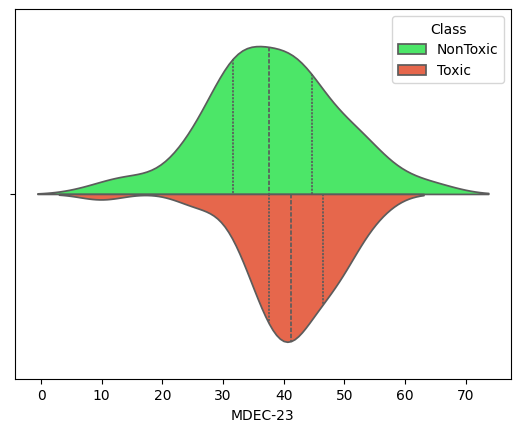

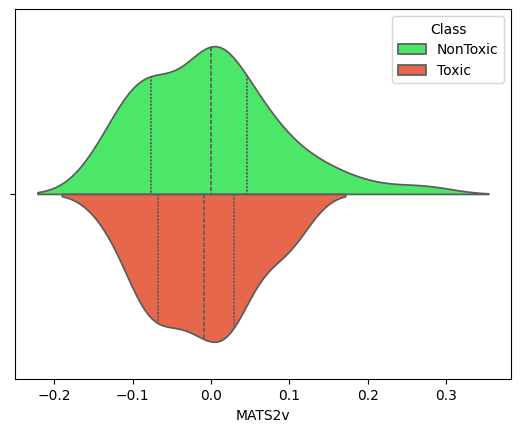

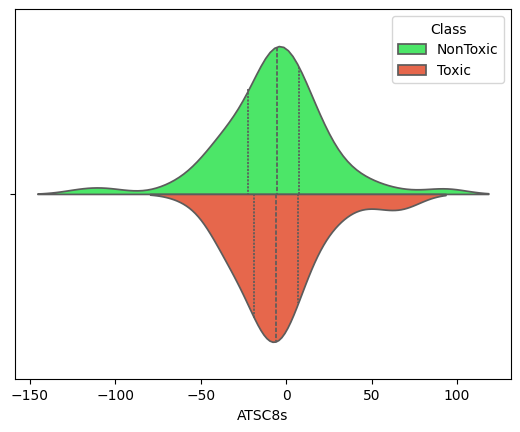

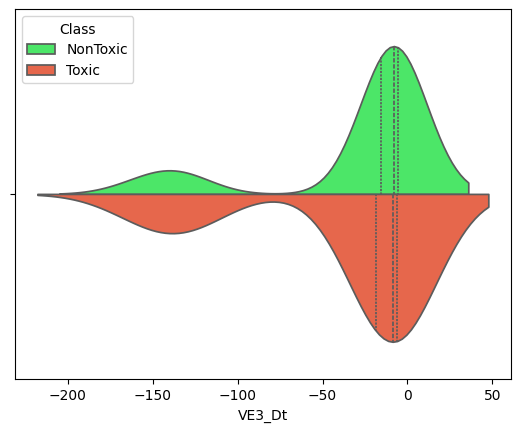

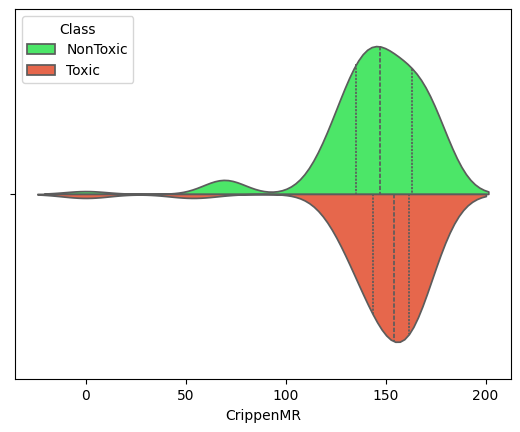

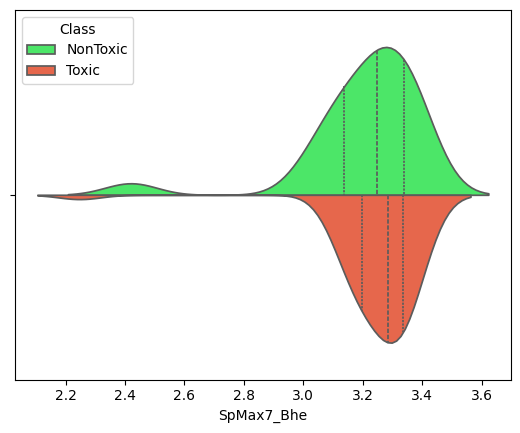

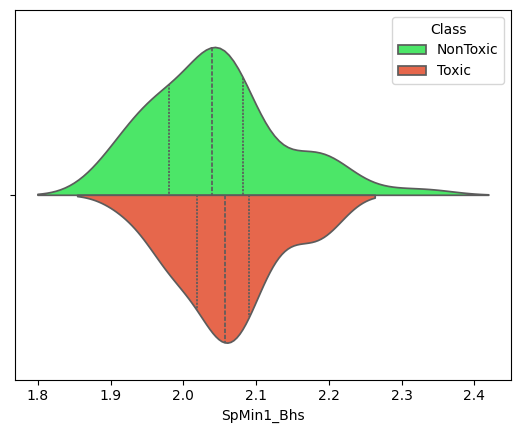

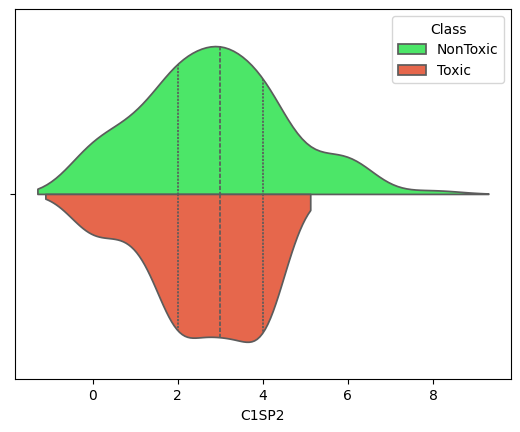

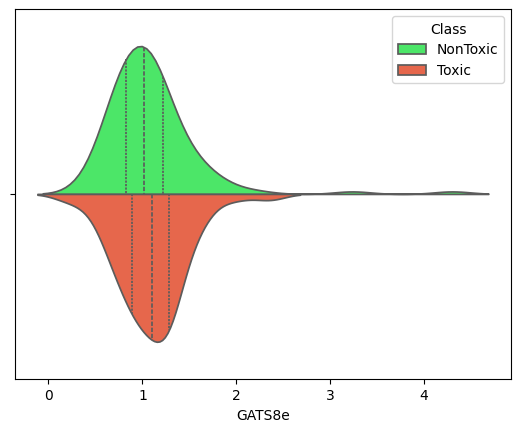

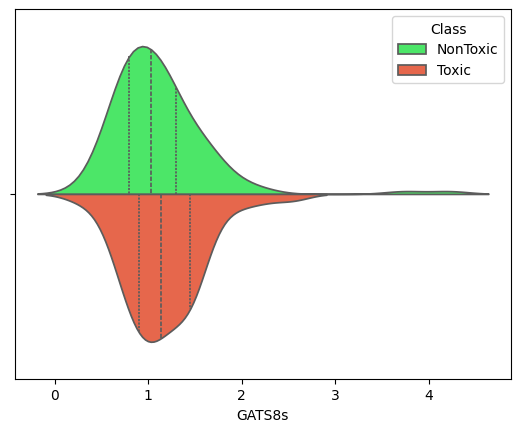

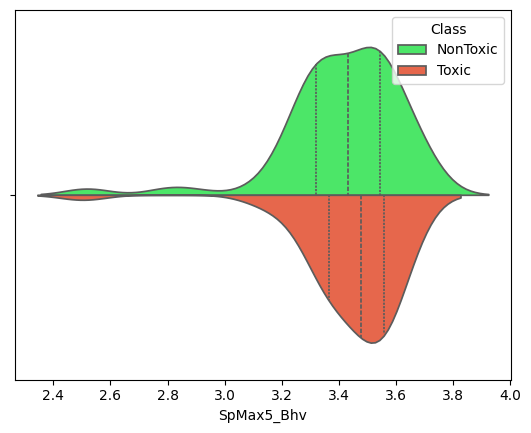

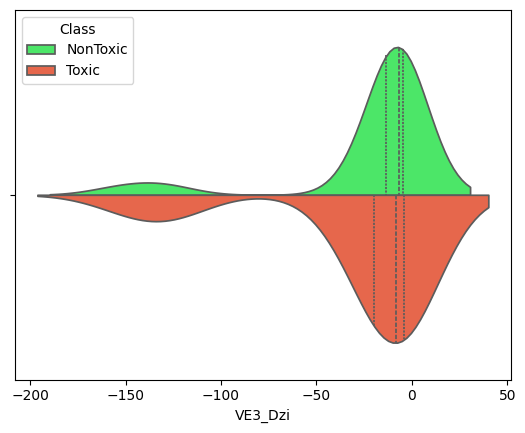

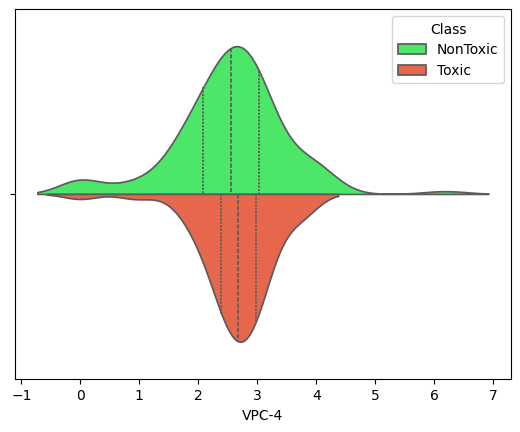

In [ ]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

def violin_plot(dataset, y_column):
  x_columns = list(dataset.columns);
  x_columns.remove(y_column);
  # y = toxicity['Class'].value_counts().values.max();
  for i in range(0, len(x_columns)):
    seaborn.violinplot(x=x_columns[i], hue=y_column, data=dataset, inner='quartile', split=True, palette=["#33FF57", "#FF5733"]);
    pyplot.show();


y_column = 'Class';
violin_plot(toxicity, y_column);

По скрипичным графикам можно сказать, насколько показатель влияет на токсичность вещества. При числовом значении того или иного показателя, насколько дальше по оси Oy оно отклоняется от оси Ox, можно понять количество элементов для каждой группы, причём, чем оно больше - тем больше того или иного вещества.

Например, для показателя "VPC-4" можно сказать, что до значения, равному 2, более вероятно встретить нетоксичное вещество в примерно равную кратность раз. Однако, с 2 до примерно 4,5 вероятности +- одиннаковые. После 4,5 вещество не является токсичным с вероятностью 1.

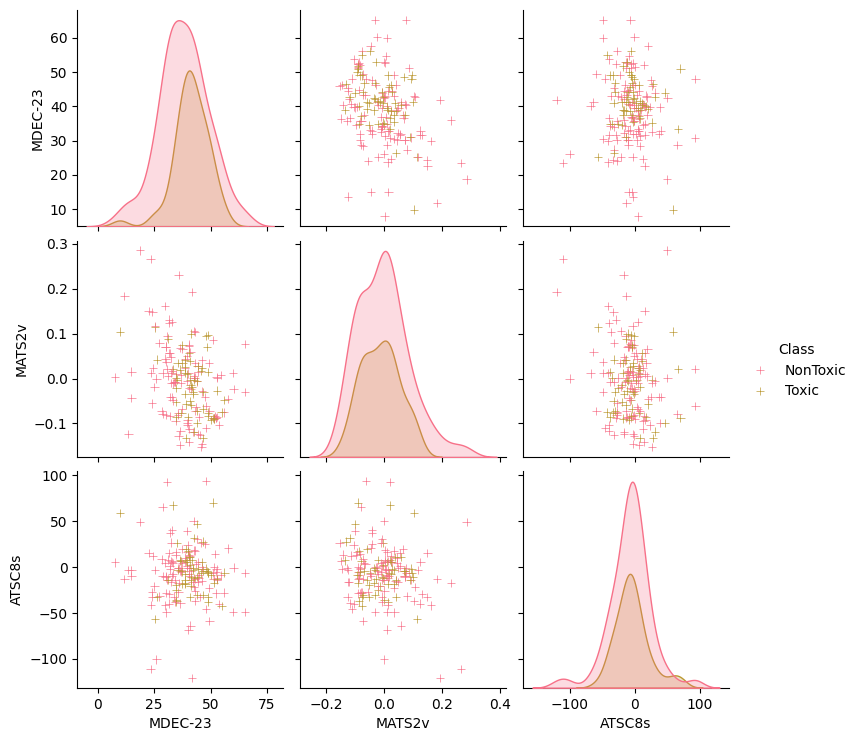

In [ ]:
# Парный график
# Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

def pair_plot(dataset, y_column, marker):
  x_columns = list(dataset.columns)[:3];
  if y_column not in x_columns:
    x_columns.append(y_column);
  datapart = dataset.copy();
  datapart = datapart[x_columns];
  seaborn.pairplot(datapart, hue=y_column, markers=marker);
  pyplot.show();


pair_plot(toxicity, y_column, '+');

По парным графикам для первых трёх параметров можно утверждать, что в большинстве своём, тот или иной параметр лишь немного влияет на нетоксичность элемента по краям параметров, в основном нетоксичность всегда больше токсичности.

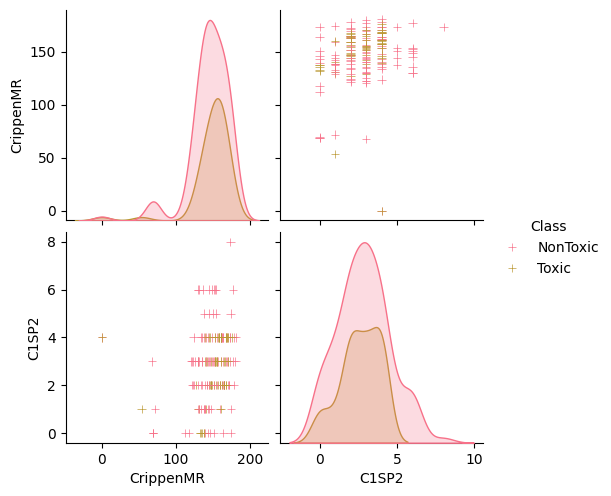

In [ ]:
# Построим парный график для целочисленного параметра "C1SP2" и интересного показателя "CrippenMR"
datapart = toxicity.copy();
datapart = datapart[['CrippenMR', 'C1SP2', y_column]];
seaborn.pairplot(datapart, hue=y_column, markers='+');
pyplot.show();

По данным двум показателям видно, что нетоксичность эелементов более вероятна, если показатель "CrippenMR" ниже 120-ти, а показатель "C1SP2" не ниже 5-ти.

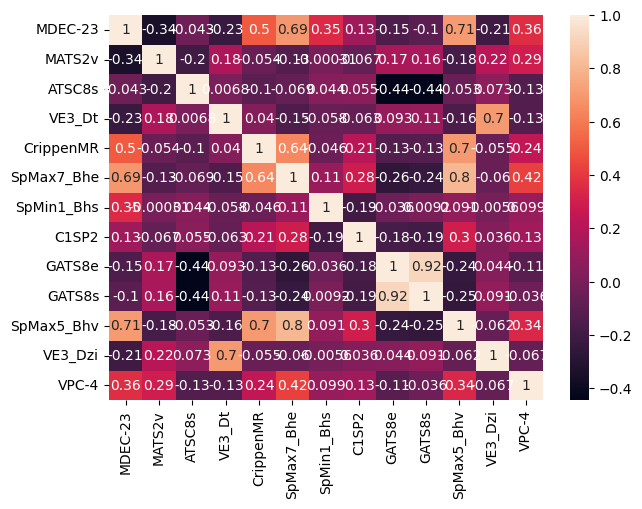

In [ ]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

pyplot.figure(figsize=(7,5));
seaborn.heatmap(toxicity.corr(numeric_only = True), annot=True);
pyplot.show();

Тут раньше была реклама, а я решил описать тепловую карту.

По графику можно увидеть корреляцию всех показателей друг с другом.
1. Самая высокая корреляция наблюдается у показателей "GATS8e" и "GATS8s", равная 0,92.
1. У показателей "SpMax7_Bhe" и "SpMax5_Bhv" корреляция вторая из лучших, она равна 0,8.
1. Показатель "SpMax5_Bhv" также идеально коррелирует с показателями "MDEC-23" и "CrippenMR", составляя корреляции 0,71 и 0,7 соответственно.
1. Из остальных показателей можно рассмотреть также "MDEC-23" с "SpMax7_Bhe" и корреляцией 0,69.

Теперь, по выделенным пяти лучшим показателям корреляции из остальных, построим линейные графики.

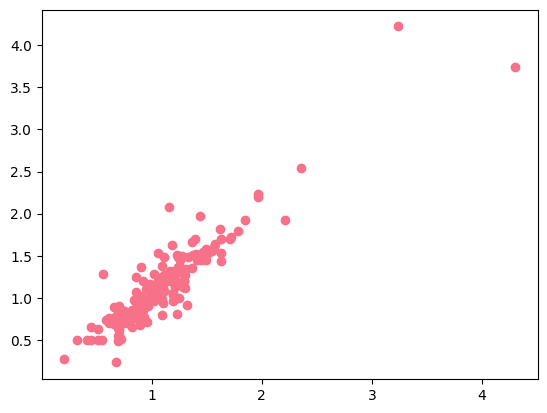

In [ ]:
# Линейный график зависимости показателей "GATS8e" и "GATS8s" с корреляцией 0,92
pyplot.scatter(data=toxicity, x='GATS8e', y='GATS8s');

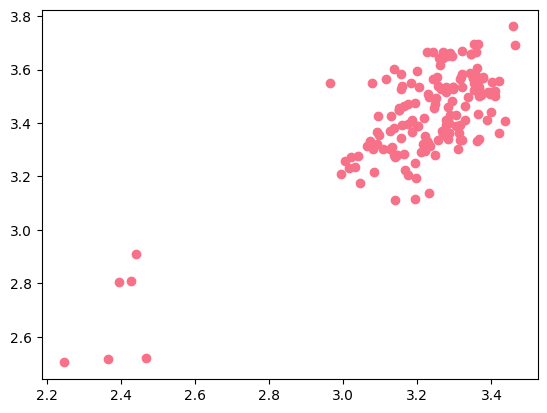

In [ ]:
# Линейный график зависимости показателей "SpMax7_Bhe" и "SpMax5_Bhv" с корреляцией 0,8
pyplot.scatter(data=toxicity, x='SpMax7_Bhe', y='SpMax5_Bhv');

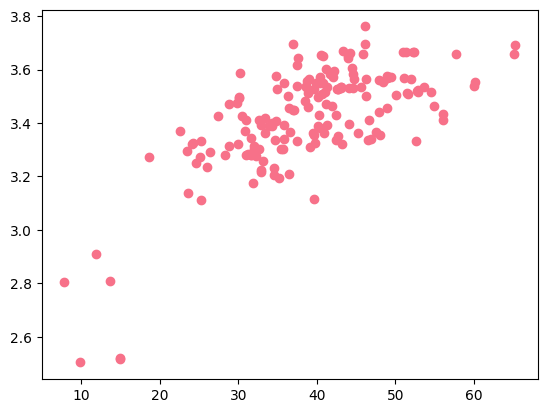

In [ ]:
# Линейный график зависимости показателей "MDEC-23" и "SpMax5_Bhv" с корреляцией 0,71
pyplot.scatter(data=toxicity, x='MDEC-23', y='SpMax5_Bhv');

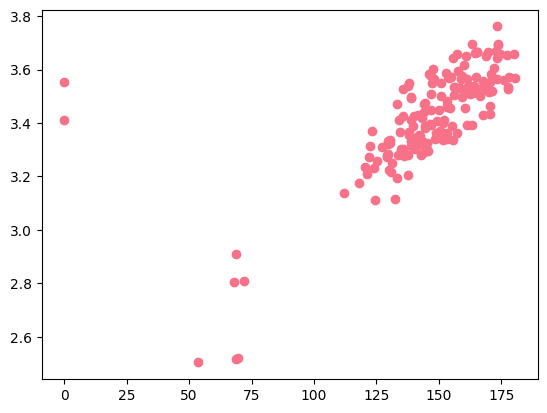

In [ ]:
# Линейный график зависимости показателей "CrippenMR" и "SpMax5_Bhv" с корреляцией 0,7
pyplot.scatter(data=toxicity, x='CrippenMR', y='SpMax5_Bhv');

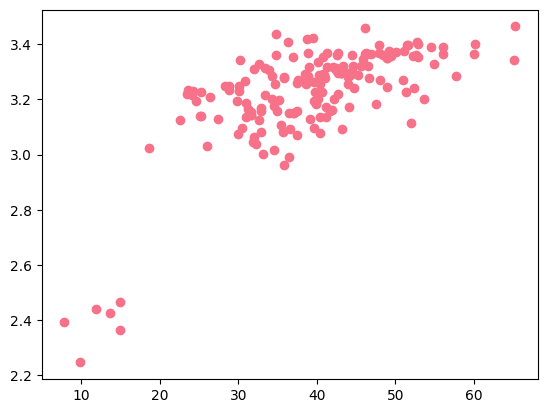

In [ ]:
# Линейный график зависимости показателей "MDEC-23" и "SpMax7_Bhe" с корреляцией 0,69
pyplot.scatter(data=toxicity, x='MDEC-23', y='SpMax7_Bhe');

Вышепостроенные графики демонстрируют, как один показатель линейно зависит от другого. Это означает, что если один показатель ниже, то другой, вероятнее всего, также

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец class.

В X складываем весь набор данных без целевой переменной.


In [ ]:
# Разделение на входное и выходное множества
y = toxicity[y_column];
x = toxicity.drop([y_column], axis=1);
print(f'X shape: {x.shape} | y shape: {y.shape}');

X shape: (171, 13) | y shape: (171,)


X имеет 171 строк и 13 столбцов, тогда как Y имеет 171 строк и только один столбец.

## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [ ]:
import scipy.stats as stats

y_mapped = y.map({'NonToxic': 0, 'Toxic': 1});
x_train, x_test, y_train, y_test = train_test_split(x, y_mapped, test_size=0.30, shuffle=False);
stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-1.7665146041575612, pvalue=0.07911484609067816, df=169.0)

Важно перемешивать и делать обучающее и тестовое множества статистически не различимыми по целевой переменной для того, чтобы минимизировать ошибку обучения, если вдруг данные будут зависеть друг от друга и от своего порядка.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped);
stats.ttest_ind(a=y_train, b=y_test)

TtestResult(statistic=0.18551039389669294, pvalue=0.8530511883813244, df=169.0)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = [];
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)));
models.append(('LDA', LinearDiscriminantAnalysis()));
models.append(('KNN', KNeighborsClassifier()));
models.append(('CART', DecisionTreeClassifier()));
models.append(('NB', GaussianNB()));
models.append(('SVC', SVC(gamma='auto')));

# оцениваем их метрики
results = [];
model_names = [];
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True);
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy');
  results.append(cv_results);
  model_names.append(name);
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()));

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.639560 (0.068591)
LDA: 0.609890 (0.075217)
KNN: 0.653846 (0.067785)
CART: 0.744505 (0.132650)
NB: 0.612637 (0.116770)
SVC: 0.669780 (0.027631)


Classification and Regression Trees и Support Vector Machines классификатор показали лучшие метрики среди всех алгоритмов.
Далее работаем с Classification and Regression Trees.

Давайте обучим модель CART на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели

Определяем нашу модель CART.
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [ ]:
# CART-обучение
cart = DecisionTreeClassifier(criterion='gini', random_state=42);
cart.fit(x_train, y_train);
cart_pred_res = cart.predict(x_test);
cart_accuracy = accuracy_score(y_test, cart_pred_res);

print(f'CART accuracy: {cart_accuracy}');
print(f'CART prediction: {cart_pred_res}');

CART accuracy: 0.6
CART prediction: [1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0]


## Визуализация решения

<Axes: title={'center': 'CART surface with original features'}>

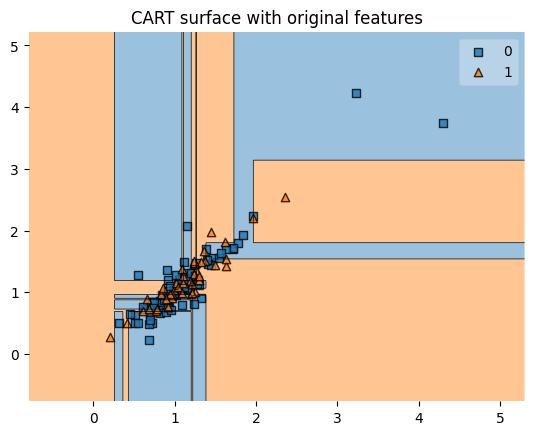

In [93]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
# Выбираем наиболее коррелирующие метрики
x_2d = x_train[['GATS8e', 'GATS8s']].values;
y_2d = y_train.values;

cart_blanch = DecisionTreeClassifier(criterion='gini');
cart_blanch.fit(x_2d, y_2d);

pyplot.title('CART surface with original features');
plot_decision_regions(X=x_2d, y=y_2d, clf=cart_blanch
)

На графике были автоматически определены области, в которых встречается то или иное значение параметров 'GATS8e' и 'GATS8s'.

In [98]:
# Думаю, прогноз
predicted = cart_blanch.predict(x_test[['GATS8e', 'GATS8s']].values);
print(predicted);

[0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0]


In [99]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y_test, predicted) # Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in numpy.unique(y_test)]))

Recall (all 1s predicted right): 0.49
Precision (confidence when predicting a 1): 0.49
Detail:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        24
           1       0.18      0.18      0.18        11

    accuracy                           0.49        35
   macro avg       0.40      0.40      0.40        35
weighted avg       0.49      0.49      0.49        35



Следуя {'NonToxic': 0, 'Toxic': 1}, можно определить, что вероятнее всего встретить можно нетоксичный элемент, почти в 3,5 раз больше, чем токсичный.